In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/marie-anne/code/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Import data

In [17]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,std_MBN,median_CF_g,mean_CF_g,std_CF_g,median_perm_g,mean_perm_g,std_perm_g,median_pMBN_g,mean_pMBN_g,std_pMBN_g
T_B1,12.947951,0.073112,0.000234,0.000018,0.0175,0.0042,0.001264,0.000519,4.410000e-13,4.090000e-07,...,0.127282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B2,12.920068,0.077814,0.000571,0.000139,0.0240,0.0057,0.002486,0.000816,1.520000e-06,1.510000e-06,...,0.110443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B3,12.932865,0.088762,0.000244,0.000030,0.0134,0.0028,0.001168,0.000555,4.270000e-13,5.640000e-07,...,0.178157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B4,10.763517,0.071173,0.000379,0.000100,0.0146,0.0031,0.002084,0.000648,7.580000e-07,1.000000e-06,...,0.052547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B5,12.942958,0.074808,0.000230,0.000033,0.0182,0.0040,0.001141,0.000447,3.970000e-13,4.670000e-07,...,0.042655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculating new values

In [18]:
calc_df = mc.updated_df(df, mc.measures_list, mc.errors_list)


In [19]:
#calc_df.to_csv('../../Data/ALL_TUBE_PIPE_calc.csv')

## Scaling values

In [20]:
scaled_df = mc.scale_general(calc_df, MinMaxScaler())[0]

## Selecting sub samples

In [21]:
tube_scaled, pipe_scaled, tube_wo_blind_scaled, tube_blind_scaled = mc.get_subsample_df(scaled_df)

In [22]:
mean_feat = tube_scaled.loc[:, mc.feat_mean]
std_feat = tube_scaled.loc[:, mc.feat_stds]

In [23]:
std_feat

,TEP_error_uV_C,Absorption_std_500,backscatter_std,Absorption_std_50,Absorption_std_100,Absorption_std_200,CF_perm_std,AUC_std
T_B1,0.017461,0.000000,0.237288,0.330382,0.303443,0.274898,0.049673,0.190733
T_B2,0.059814,1.000000,0.491525,0.646362,0.729007,1.000000,0.103250,0.864154
T_B3,0.158423,0.098855,0.000000,0.368786,0.434729,0.187684,0.138989,0.285403
T_B4,0.000000,0.678038,0.050847,0.467570,0.378747,0.488943,0.654792,0.554949
T_B5,0.032736,0.128237,0.203390,0.253680,0.107010,0.242322,0.077798,0.226383
T_B6,0.175299,0.065239,0.050847,0.389055,0.680208,0.354498,0.679242,0.154678
T_B7,0.251228,0.546896,1.000000,0.764242,0.654942,0.198353,0.029173,0.705663
T_B8,0.087787,0.484147,0.576271,0.100171,0.257865,0.259931,0.833665,0.210271
T_AR,0.167650,0.038347,0.169492,0.000000,0.632153,0.207468,0.548055,0.250318
T_N,0.051060,0.469622,0.440678,1.000000,0.260342,0.109275,1.000000,1.000000


# get PCA

In [24]:
def get_PCA(df, df_std):
    col_vector = df.columns
    pca = PCA(n_components=0.9, svd_solver='full')
    pca = pca.fit(df)
    xvector = pca.components_[0] 
    yvector = pca.components_[1]
    
    xs = pca.transform(df)[:,0] 
    ys = pca.transform(df)[:,1]
    
    df['PC1'] = xs
    df['PC2'] = ys
    df['stdPC'] = pca.transform(df_std)[:,0]
    vector = pd.DataFrame([xvector*max(xs), yvector*max(ys)], columns = col_vector, index=['x_vec', 'y_vec']).T
    
    return pca, df, vector

In [26]:
pca_tube = get_PCA(mean_feat, std_feat)

In [27]:
pca = pca_tube[0]
df_pca = pca_tube[1]

In [28]:
df_pca

,TEP_mean_uV_C,Absorption_avg_500,backscatter_avg,Absorption_avg_50,Absorption_avg_100,Absorption_avg_200,CF_perm,AUC_avg,PC1,PC2,stdPC
T_B1,0.907738,0.010566,0.182222,0.135434,0.154523,0.044000,0.083521,0.301883,-0.635686,-0.258673,-0.328528
T_B2,0.896151,1.000000,0.471111,0.635434,0.695701,1.000000,0.087820,0.770838,0.986944,-0.459178,1.124711
T_B3,0.901469,0.039918,0.000000,0.096154,0.121720,0.000000,0.081138,0.281228,-0.712425,-0.224991,-0.278646
T_B4,0.000000,0.436748,0.053333,0.470949,0.488414,0.668952,0.971500,0.532883,0.376307,0.917145,0.352342
T_B5,0.905663,0.000000,0.213333,0.085106,0.000000,0.091429,0.126549,0.333517,-0.674865,-0.245935,-0.375858
T_B6,0.113989,0.029645,0.062222,0.159574,0.344919,0.097905,0.983379,0.205120,-0.425024,0.938416,-0.106694
T_B7,0.880394,0.515703,0.737778,0.398936,0.617951,0.334667,0.014979,1.000000,0.394064,-0.514549,0.519557
T_B8,0.620941,0.262401,0.600000,0.000000,0.063791,0.126857,0.235344,0.356787,-0.409814,-0.085560,-0.067449
T_AR,0.907355,0.156736,0.200000,0.132570,0.574400,0.264381,0.111670,0.278610,-0.293839,-0.249179,-0.324428
T_N,0.017291,0.625770,0.528889,0.898118,0.541039,0.585333,0.958715,0.542754,0.717432,0.821491,0.464772


In [ ]:
    for i in range(len(xs)):
    # circles project samples (ie rows  as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo', alpha=0.7)
        plt.text(xs[i]*0.86, ys[i]*0.95, list(data.index)[i], color='b', fontsize=12)
    plt.xlabel("PC"+str(pc_i+1))
    plt.ylabel("PC"+str(pc_j+1))
    plt.title(title, fontsize=20)
    plt.show()

Text(0.5, 1.0, 'Tubes')

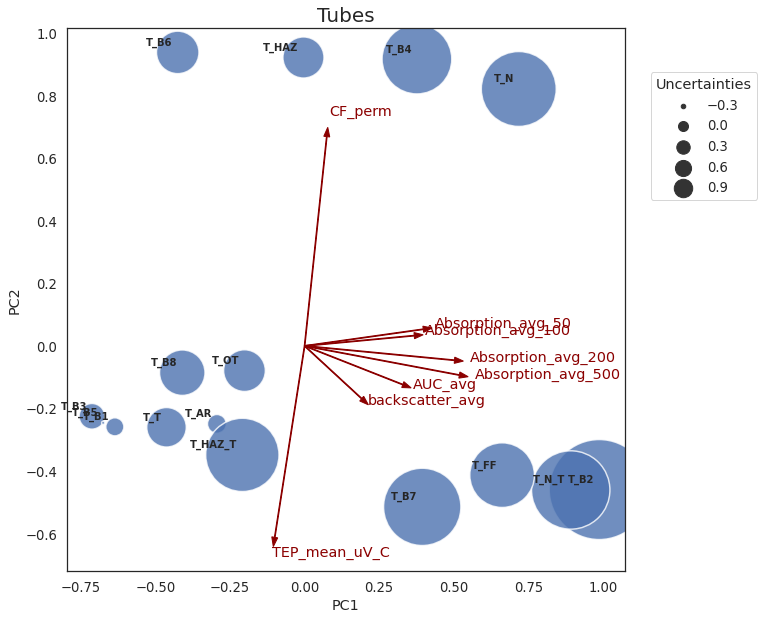

In [347]:
ax, fig = plt.subplots(figsize=(10,10))
g = sns.scatterplot(x= 'PC1', y='PC2', size='stdPC', data=pca_tube[1], sizes=(10,10000), alpha=0.8)

for i, x, y in zip(pca_tube[1].index, pca_tube[1]['PC1'], pca_tube[1]['PC2']):
    plt.annotate(i, (x, y), xytext=(-5, 5),
                 textcoords = 'offset points',
                 va='bottom', 
                 ha='right',
                 fontsize=10,
                fontweight='semibold')
for i in range(len(pca_tube[2])):
    plt.arrow(0, 0, pca_tube[2].iloc[i,0], pca_tube[2].iloc[i,1],
                  color='darkred', width=0.0025, head_width=0.02)
    plt.text(pca_tube[2].iloc[i,0]*1.1, pca_tube[2].iloc[i,1]*1.1,
                 pca_tube[2].index[i], color='darkred')

plt.legend(loc= 'best', bbox_to_anchor=(1.25, 0.93), markerscale=0.2, title='Uncertainties')
plt.title('Tubes', fontsize=20)

(0.0, 6.0)

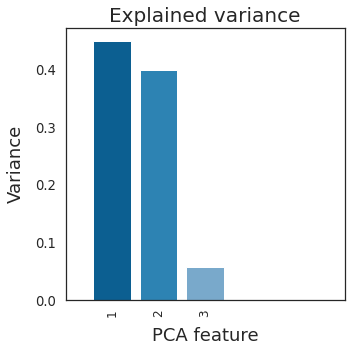

In [195]:
feat = range(1, pca.n_components_ + 1)
sns.set_theme(style='white', font_scale=1.2)
plt.figure(figsize=(5,5))
plt.bar(feat, pca.explained_variance_ratio_, color=sns.color_palette('PuBu_r', 5, desat=0.9))
plt.xticks(feat, rotation=90, fontsize=12)
plt.ylabel('Variance', fontsize=18, labelpad=10)
plt.xlabel('PCA feature', fontsize=18, labelpad=10)
plt.title('Explained variance', fontsize=20)
plt.xlim(0, 6)